# Homework 2 - CSCE 633
## Arya Rahmanian

### Imports

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import copy
from utils import *

## Part A - Logistic Regression

In [95]:
df = pd.read_csv("hitters.csv")

In [96]:
print(df.head() , "\n")
print("The shape of the dataset before preprocessing is: ", df.shape)

df.dropna(inplace=True)

              Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0     NaN          A  
1   475.0 

In [97]:
# Extracting labels and features
X = df[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','League','Division','PutOuts','Assists','Errors','Salary']]
y = df[['NewLeague']]

### One-hot encoding for categorical features

In [98]:
# select numbers
X_cat = X.select_dtypes(exclude=['int64', 'float64'])                                                                                                         
X_dog = X.select_dtypes(include=['int64', 'float64'])                                                                                                         
                                                                                                                                                              
X_cat = pd.get_dummies(X_cat)                                                                                                                                 
X = pd.concat([X_cat, X_dog], axis=1)   

### Transform labels

In [99]:
NewLeague2number_dict = {
    'A':0,
    'N':1
}
y=y.replace({"NewLeague": NewLeague2number_dict})

## Split Data

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.astype(np.int64)
X_test = X_test.astype(np.int64)
print(X_train.head())
print(y_train.head())

     League_A  League_N  Division_E  Division_W  AtBat  Hits  HmRun  Runs  \
177         1         0           1           0    441   118     28    84   
184         0         1           1           0    586   159     12    72   
91          0         1           1           0    475   123     27    76   
3           0         1           1           0    496   141     20    65   
162         1         0           0           1    165    39      2    13   

     RBI  Walks  ...  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks  PutOuts  \
177   86     68  ...    2723    750     126    433   420     309      190   
184   79     53  ...    3082    880      83    363   477     295      181   
91    93     72  ...    1810    471     108    292   343     267      226   
3     78     37  ...    5628   1575     225    828   838     354      200   
162    9     16  ...     196     44       2     18    10      18      332   

     Assists  Errors  Salary  
177        2       2    1300  
184       13

## Logistic Regression

In [135]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
         
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A
        
    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            dz = A - y 

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(A - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def accuracy(self,y, y_hat):
        accuracy = np.sum(y == y_hat) / len(y)
        return accuracy
                
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


X_train_np shape: (184, 21)
X_test_np shape: (79, 21)
y_train_np shape: (184,)
y_test_np shape: (79,)


C:\Users\Arya Rahmanian\AppData\Local\Temp\ipykernel_18592\3268544250.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


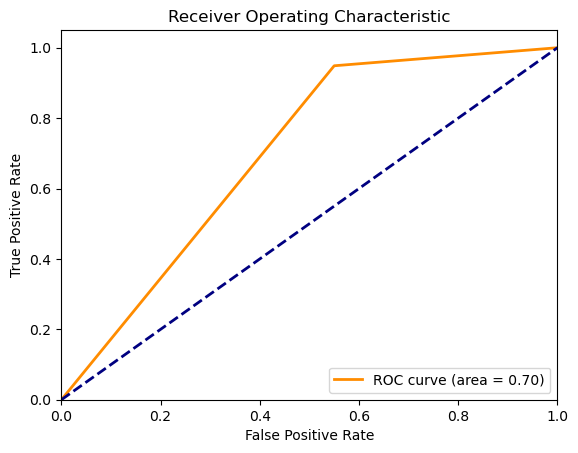

In [155]:
y_train_np = y_train_np.flatten()
y_test_np = y_test_np.flatten()
print(f'X_train_np shape: {X_train_np.shape}')
print(f'X_test_np shape: {X_test_np.shape}')
print(f'y_train_np shape: {y_train_np.shape}')
print(f'y_test_np shape: {y_test_np.shape}')


# Training Logistic reg model
model = LogisticRegression(learning_rate=0.001, n_iters=50000000)
model.fit(X_train_np, y_train_np)

# predict
probabilities = model.predict(X_test_np)

fpr, tpr, thresholds = roc_curve(y_test_np, probabilities)

auc = roc_auc_score(y_test_np, probabilities)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [157]:
print("Coefficients (weights) for each feature:")
print(model.weights)
print("Bias term:")
print(model.bias)

Coefficients (weights) for each feature:
[-1.35333944e+03  1.20299210e+03 -1.82376162e+02  3.20288216e+01
  6.21890656e+00 -1.78120997e+01  2.53364713e+01 -9.17917223e+00
  2.07438817e+00 -8.06636914e-01 -9.28804813e+01 -1.42288626e+00
  1.27358639e+01  1.10058197e+01 -5.88665342e+00 -6.72417871e+00
  1.77181541e+00  7.10717203e-01  1.59089649e+00 -4.49510393e+01
 -5.68642983e-01]
Bias term:
-150.34734056081774


C:\Users\Arya Rahmanian\AppData\Local\Temp\ipykernel_18592\3268544250.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


optimal decision threshold to maximize F1 score: 0.001
maximum F1 score: 0.7551020408163266


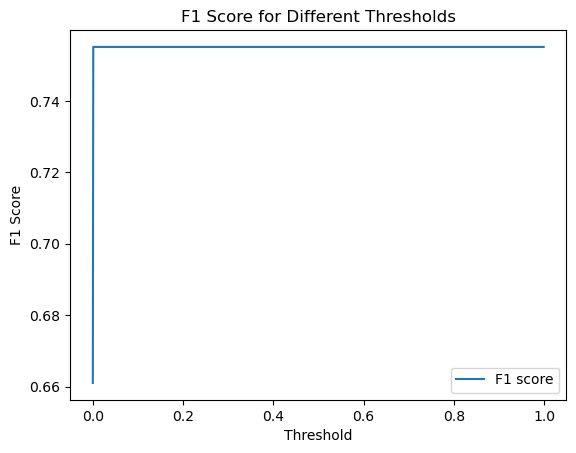

In [160]:
probabilities = model.predict(X_test_np)

# find best threshold
thresholds = np.arange(0.0, 1.0, 0.001)
f1_scores = []

for threshold in thresholds:
    y_pred = (probabilities >= threshold).astype(int)
    f1 = f1_score(y_test_np, y_pred)
    f1_scores.append(f1)

optimal_threshold = thresholds[np.argmax(f1_scores)]
max_f1_score = max(f1_scores)
print(f"optimal decision threshold to maximize F1 score: {optimal_threshold}")
print(f"maximum F1 score: {max_f1_score}")

# plotting F1 score over different thresholds

plt.plot(thresholds, f1_scores, label="F1 score")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score for Different Thresholds")
plt.legend()
plt.show()


### Below, I used the prebuilt Logistic Regression architecture from scikit learn to see what the best performance I could get theorietically.

Accuracy: 0.9367088607594937
AUROC: 0.9666666666666666


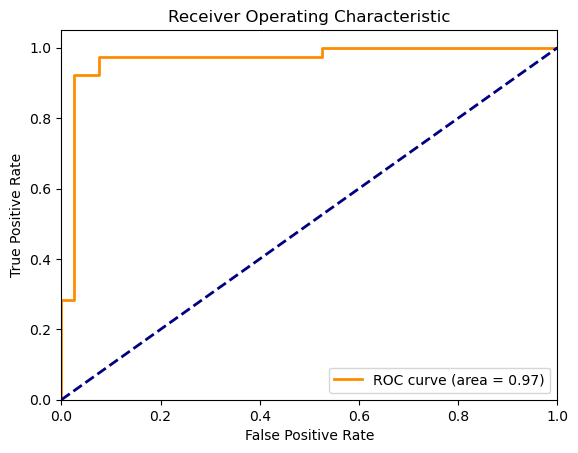

In [161]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_np, y_train_np)


predictions = model.predict(X_test_np)

accuracy = accuracy_score(y_test_np, predictions)
print(f'Accuracy: {accuracy}')

probabilities = model.predict_proba(X_test_np)[:, 1]

fpr, tpr, _ = roc_curve(y_test_np, probabilities)
roc_auc = roc_auc_score(y_test_np, probabilities)
print(f'AUROC: {roc_auc}')

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Part B - Regularization

## Splitting the Dataset

In [15]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# 2nd split: 50% of the remaining data for validation, 50% for test. Ultimately a 60% training, 20% validation, and 20% dataset
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

X_train = X_train.astype(np.int64)
X_val = X_val.astype(np.int64)
X_test = X_test.astype(np.int64)

## Ridge Model

In [11]:
def train_ridge(X_train, y_train, X_val, y_val, alpha_vals, n_bootstraps=1000, max_iter=1000):
    aucs_ridge = {alpha: [] for alpha in alpha_vals}
    
    for _ in range(n_bootstraps):
        X_resampled, y_resampled = resample(X_train, y_train)
        
        for alpha in alpha_vals:
            model = Ridge(alpha=alpha, max_iter=max_iter)
            model.fit(X_resampled, y_resampled)
            
            y_val_pred = model.predict(X_val)
            
            auc = roc_auc_score(y_val, y_val_pred)
            aucs_ridge[alpha].append(auc)
    
    mean_aucs_ridge = {alpha: np.mean(aucs) for alpha, aucs in aucs_ridge.items()}
    
    return mean_aucs_ridge

In [29]:
alpha_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
mean_aucs_ridge = train_ridge(X_train, y_train, X_val, y_val, alpha_vals, max_iter=1000)
print(mean_aucs_ridge)

#get optimal alpha
optimal_alpha = max(mean_aucs_ridge, key=mean_aucs_ridge.get)
print(f"The optimal alpha is {optimal_alpha} with a mean AUC of {mean_aucs_ridge[optimal_alpha]:.4f}")

{0.001: 0.9224159420289855, 0.01: 0.922404347826087, 0.1: 0.9223275362318841, 1: 0.9218231884057971, 10.0: 0.9177884057971014, 100.0: 0.8369463768115943, 1000.0: 0.5687173913043478}
The optimal alpha is 0.001 with a mean AUC of 0.9224


The different alpha values used allow the model to train with different levels of regularization; the larger the alpha value, the more regularization. Since the instructions specift n_bootstraps, I was able to adjust the max iterations to see what is the appropriate number of iterations to train the ridge model with. In the end, the model is pretty robust as with a similar AUC score but with different alpha values. I placed some of the data I collected below.

50000 iterations: The optimal alpha is 0.001 with a mean AUC of 0.9231

10000 iterations: The optimal alpha is 0.001 with a mean AUC of 0.9229

1000 iterations: The optimal alpha is 0.01 with a mean AUC of 0.9230

500 iterations: The optimal alpha is 0.001 with a mean AUC of 0.9231

100 iterations: The optimal alpha is 0.01 with a mean AUC of 0.9233

## Lasso Model

In [34]:
def train_lasso(X_train, y_train, X_val, y_val, alpha_vals, n_bootstraps=1000, max_iter=1000):
    aucs_lasso = {alpha: [] for alpha in alpha_vals}
    
    for _ in range(n_bootstraps):
        # bootstrap
        X_resampled, y_resampled = resample(X_train, y_train)
        
        for alpha in alpha_vals:
            # Train lasso 
            model = Lasso(alpha=alpha, max_iter=max_iter)
            model.fit(X_resampled, y_resampled)
            
            y_val_pred = model.predict(X_val)
            
            auc = roc_auc_score(y_val, y_val_pred)
            aucs_lasso[alpha].append(auc)
    
    #calculate AUC for each alpha
    mean_aucs_lasso = {alpha: np.mean(aucs) for alpha, aucs in aucs_lasso.items()}
    
    return mean_aucs_lasso


In [35]:
alpha_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
mean_aucs_lasso = train_lasso(X_train, y_train, X_val, y_val, alpha_vals, max_iter=100000)
print(mean_aucs_lasso)

#get optimal alpha
optimal_alpha = max(mean_aucs_lasso, key=mean_aucs_lasso.get)
print(f"The optimal alpha is {optimal_alpha} with a mean AUC of {mean_aucs_lasso[optimal_alpha]:.4f}")

{0.001: 0.9230869565217392, 0.01: 0.9212652173913044, 0.1: 0.8745028985507246, 1: 0.5147898550724638, 10.0: 0.4513246376811594, 100.0: 0.4849449275362319, 1000.0: 0.5}
The optimal alpha is 0.001 with a mean AUC of 0.9231


With the Lasso model, I experimented with a large range of different max iterations. Anything below 10,000 didn't converge and would throw an error. From there, most of the other models were pretty consistent with the bootstrapping. I also tried setting warm_start to True and also also changing selection to "random". But both of those parameters didn't change the optimal alpha nor the AUC while keeping max_iteration at 20,000

10000 iterations: The optimal alpha is 0.001 with a mean AUC of 0.9221

20000 iterations: The optimal alpha is 0.001 with a mean AUC of 0.9229

50000 iterations: The optimal alpha is 0.001 with a mean AUC of 0.9224

100000 iterations: The optimal alpha is 0.001 with a mean AUC of 0.9231

## Comparing Ridge and Lasso

In [37]:
def ridge_coefficients(X_train, y_train, alpha, max_iter=1000):
    model = Ridge(alpha=alpha, max_iter=max_iter)
    model.fit(X_train, y_train)
    
    coefficients = model.coef_
    
    return model, coefficients

In [38]:
def lasso_coefficients(X_train, y_train, alpha, max_iter=1000):
    model = Lasso(alpha=alpha, max_iter=max_iter)
    model.fit(X_train, y_train)
    
    coefficients = model.coef_
    
    return model, coefficients

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#optimal alpha values from previous tuning process
optimal_alpha_ridge = 0.001  
optimal_alpha_lasso = 0.01  


ridge_model, ridge_coeffs = ridge_coefficients(X_train_scaled, y_train, optimal_alpha_ridge)


lasso_model, lasso_coeffs = lasso_coefficients(X_train_scaled, y_train, optimal_alpha_lasso)

print("Ridge Coefficients:")
print(ridge_coeffs)

print("Lasso Coefficients:")
print(lasso_coeffs)

#check if coefficients are the same
coefficients_same = np.allclose(ridge_coeffs, lasso_coeffs)
print(f"Are the coefficients the same? {coefficients_same}")

Ridge Coefficients:
[[-0.22100497  0.22100497 -0.00379556  0.00379556  0.03955212 -0.03876009
   0.03310687 -0.01838257 -0.03603556  0.03095579  0.01424648 -0.31465684
   0.17021747 -0.01706586  0.21639683  0.03566848 -0.10100085  0.02849894
   0.02228519 -0.00316509 -0.02071691]]
Lasso Coefficients:
[-4.29054237e-01  0.00000000e+00 -7.34126580e-04  9.90007793e-18
  7.98086859e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.34108376e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
Are the coefficients the same? False


The coefficients are different because Lasso performs both regularization and feature selection, meaning it can shrink some coefficients to zero. On the other hand, Ridge performs only regularization and typically does not shrink coefficients to zero.

## Ridge and Lasso AUC

In [41]:
def ridge_area_under_curve(X_train, y_train, X_val, y_val, alpha, max_iter=1000):

    model = Ridge(alpha=alpha, max_iter=max_iter)
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    
    # auc score
    auc = roc_auc_score(y_val, y_val_pred)
    
    #roc curve
    fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
    
    return auc, fpr, tpr

In [42]:
def lasso_area_under_curve(X_train, y_train, X_val, y_val, alpha, max_iter=1000):
    
    model = Lasso(alpha=alpha, max_iter=max_iter)
    model.fit(X_train, y_train)
    
    #predict
    y_val_pred = model.predict(X_val)
    
    #auc
    auc = roc_auc_score(y_val, y_val_pred)
    
    #roc curve
    fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
    
    return auc, fpr, tpr

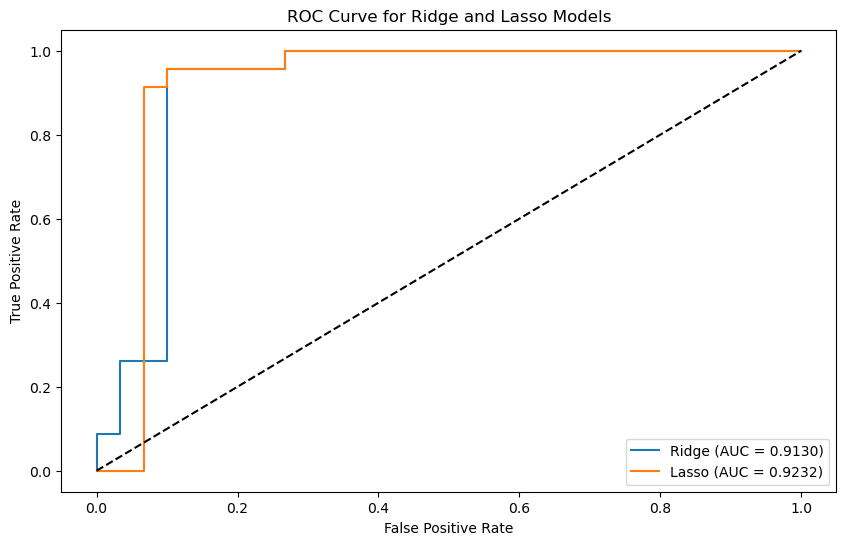

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


optimal_alpha_ridge = 0.001  
optimal_alpha_lasso = 0.01  

# ridge model
ridge_auc, ridge_fpr, ridge_tpr = ridge_area_under_curve(X_train_scaled, y_train, X_val_scaled, y_val, optimal_alpha_ridge, max_iter=10000)

#lasso model
lasso_auc, lasso_fpr, lasso_tpr = lasso_area_under_curve(X_train_scaled, y_train, X_val_scaled, y_val, optimal_alpha_lasso, max_iter=150000)


plt.figure(figsize=(10, 6))
plt.plot(ridge_fpr, ridge_tpr, label=f'Ridge (AUC = {ridge_auc:.4f})')
plt.plot(lasso_fpr, lasso_tpr, label=f'Lasso (AUC = {lasso_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ridge and Lasso Models')
plt.legend(loc='best')

plt.show()